In [1]:
from GS import *

In [2]:
# Load and process adata
adata = sc.read("/Users/AlexanderWang/Desktop/Califano_Lab_Fall_2021/LNCaPF21_project/data/LNCaPWT_R6/gExpr/LNCaPWT_STEP06_gExpr_ANNDATA_convert_mat_to_AnnData/LNCaPWT_SCE_anndata_gExpr_filt_geneNames.h5ad")
sc.pp.normalize_total(adata, inplace=True,target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack', random_state=0)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

/Users/AlexanderWang/opt/miniconda3/lib/python3.8/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


In [3]:
# Run GS clustering
adata = run_fastclust_GS_clustering(adata, res_vector = np.arange(0.1, 2, 0.2), NN_vector = np.arange(11, 101, 10))

Computing distance object...
Beginning GridSearch clustering...


GridSearch: 100%|███████████████████████████████| 90/90 [00:56<00:00,  1.60it/s]


In [4]:
# Optimal clusters
adata.obs["GS_clusters"]

AAACCTGCATCCGCGA.1    0
AAACCTGTCCGAATGT.1    0
AAACCTGTCCGCTGTT.1    0
AAACCTGTCTAACCGA.1    0
AAACGGGAGACTAGAT.1    0
                     ..
TTTGTCAGTTGGTTTG.1    0
TTTGTCATCAAGGTAA.1    1
TTTGTCATCACCCGAG.1    0
TTTGTCATCGAATCCA.1    1
TTTGTCATCTTGAGAC.1    0
Name: GS_clusters, Length: 2450, dtype: category
Categories (2, object): ['0', '1']

In [5]:
# Information on the run
print(adata.GS_results_dict["search_df"])

   iter n_pcs  resolution knn n_clust subsamp_iter   sil_avg seed
0     0    50         0.1  11       3            1  0.341615    1
1     1    50         0.3  11       7            1  0.245206    1
2     2    50         0.5  11      10            1  0.151299    1
3     3    50         0.7  11      13            1  0.150169    1
4     4    50         0.9  11      17            1  0.117836    1
..  ...   ...         ...  ..     ...          ...       ...  ...
85   85    50         1.1  91       9            1  0.179291    1
86   86    50         1.3  91      12            1  0.167786    1
87   87    50         1.5  91      12            1  0.172865    1
88   88    50         1.7  91      14            1  0.171391    1
89   89    50         1.9  91      15            1  0.164414    1

[90 rows x 8 columns]


In [6]:
print(adata.GS_results_dict["opt_result"])

[0.1, 21]


In [7]:
print(adata.GS_results_dict["run_params"])

{'res_vector': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]), 'NN_vector': array([11, 21, 31, 41, 51, 61, 71, 81, 91]), 'use_reduction': True, 'reduction_slot': 'X_pca', 'SS_weights': 'unitary', 'SS_exp_base': 2.718282, 'clust_alg': 'Leiden', 'n_subsamples': 1, 'subsamples_pct_cells': 100}


In [8]:
# Information on the run search plots
search_plt_sil_avg = get_GS_search_plot(adata, "sil_avg")
search_plt_iter = get_GS_search_plot(adata, "iter")
search_plt_n_clust = get_GS_search_plot(adata, "n_clust")

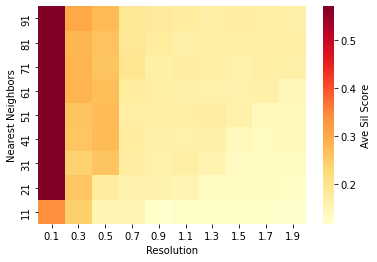

In [9]:
search_plt_sil_avg

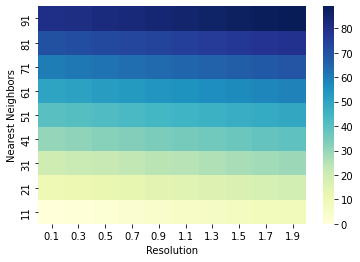

In [10]:
search_plt_iter

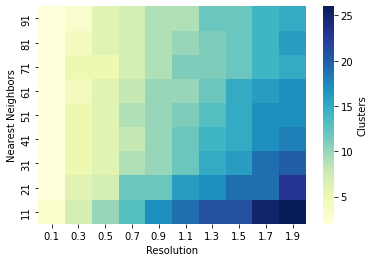

In [11]:
search_plt_n_clust